In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('typhoid_india_data.csv')

In [3]:
data

,Patient_ID,Name,Age,Gender,State,City,Date_Reported,Symptoms,Hospitalized,Days_Hospitalized,...,Ward_Number,Blood_Test_Result,Widal_Test_Result,Temperature_At_Admission,White_Blood_Cell_Count,Platelet_Count,Previous_History_Typhoid,Water_Source,Sanitation_Level,Health_Education_Level
0,TYP100000,Patient_0,52,Female,Punjab,City_328,2024-01-01,"Weakness, Constipation, Diarrhea, Headache",True,0,...,15,Positive,Positive,101.1,7841.0,164812.0,True,Tank,Good,Low
1,TYP100001,Patient_1,15,Other,Maharashtra,City_58,2023-08-16,"Abdominal Pain, Headache, Fever",False,2,...,9,Positive,Positive,100.0,8700.0,110316.0,False,Borewell,Poor,Medium
2,TYP100002,Patient_2,72,Other,Chhattisgarh,City_13,2023-02-14,"Constipation, Weakness, Headache, Fever, Diarrhea",False,0,...,3,Positive,Positive,99.5,10497.0,166871.0,True,Tank,Poor,Medium
3,TYP100003,Patient_3,61,Other,Uttar Pradesh,City_380,2024-02-19,"Weakness, Diarrhea, Loss of Appetite, Abdomina...",False,12,...,9,Positive,Negative,100.4,9786.0,227719.0,False,Tank,Good,Low
4,TYP100004,Patient_4,21,Female,Himachal Pradesh,City_141,2023-12-16,"Abdominal Pain, Constipation",True,4,...,18,Positive,Positive,102.0,7691.0,230092.0,False,Borewell,Moderate,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,TYP102995,Patient_2995,35,Female,Assam,City_70,2023-02-02,"Fever, Loss of Appetite, Headache",False,0,...,3,Positive,Negative,99.8,8592.0,237831.0,True,Borewell,Poor,Low
2996,TYP102996,Patient_2996,33,Other,Haryana,City_437,2023-06-22,"Headache, Abdominal Pain, Weakness",False,0,...,9,Positive,Positive,100.2,9029.0,245998.0,False,Tank,Moderate,Low
2997,TYP102997,Patient_2997,84,Female,Assam,City_38,2023-05-22,"Loss of Appetite, Headache, Diarrhea, Constipa...",False,0,...,5,Inconclusive,Positive,102.4,8553.0,197497.0,False,Tap,Good,Medium
2998,TYP102998,Patient_2998,16,Other,Haryana,City_232,2023-11-24,"Constipation, Headache",False,4,...,16,Negative,Positive,99.6,9008.0,296792.0,False,Borewell,Moderate,High


In [4]:
data.isnull().sum()

Patient_ID                     0
Name                           0
Age                            0
Gender                         0
State                          0
City                           0
Date_Reported                  0
Symptoms                       0
Hospitalized                   0
Days_Hospitalized              0
Diagnosis_Confirmed            0
Treatment_Given             1003
Outcome                        0
Doctor_Name                    0
Hospital_Name                  0
Ward_Number                    0
Blood_Test_Result              0
Widal_Test_Result              0
Temperature_At_Admission       0
White_Blood_Cell_Count         0
Platelet_Count                 0
Previous_History_Typhoid       0
Water_Source                   0
Sanitation_Level               0
Health_Education_Level         0
dtype: int64

In [5]:
data.columns

Index(['Patient_ID', 'Name', 'Age', 'Gender', 'State', 'City', 'Date_Reported',
       'Symptoms', 'Hospitalized', 'Days_Hospitalized', 'Diagnosis_Confirmed',
       'Treatment_Given', 'Outcome', 'Doctor_Name', 'Hospital_Name',
       'Ward_Number', 'Blood_Test_Result', 'Widal_Test_Result',
       'Temperature_At_Admission', 'White_Blood_Cell_Count', 'Platelet_Count',
       'Previous_History_Typhoid', 'Water_Source', 'Sanitation_Level',
       'Health_Education_Level'],
      dtype='object')

In [6]:
data['Treatment_Given'].value_counts()

Treatment_Given
Supportive Care    1022
Antibiotics         975
Name: count, dtype: int64

In [7]:
data['Treatment_Given']

0                   NaN
1       Supportive Care
2           Antibiotics
3                   NaN
4           Antibiotics
             ...       
2995    Supportive Care
2996        Antibiotics
2997    Supportive Care
2998    Supportive Care
2999    Supportive Care
Name: Treatment_Given, Length: 3000, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Gender                    3000 non-null   object 
 4   State                     3000 non-null   object 
 5   City                      3000 non-null   object 
 6   Date_Reported             3000 non-null   object 
 7   Symptoms                  3000 non-null   object 
 8   Hospitalized              3000 non-null   bool   
 9   Days_Hospitalized         3000 non-null   int64  
 10  Diagnosis_Confirmed       3000 non-null   bool   
 11  Treatment_Given           1997 non-null   object 
 12  Outcome                   3000 non-null   object 
 13  Doctor_Name               3000 non-null   object 
 14  Hospital

In [9]:
data.describe()

,Age,Days_Hospitalized,Ward_Number,Temperature_At_Admission,White_Blood_Cell_Count,Platelet_Count
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,43.678000,3.590000,10.021000,101.035933,8993.085333,199227.090667
std,25.823799,4.857204,5.471307,1.507691,1504.590240,51630.323318
min,1.000000,0.000000,1.000000,96.100000,4283.000000,20363.000000
25%,21.000000,0.000000,5.000000,100.000000,7960.750000,165524.750000
50%,43.000000,0.000000,10.000000,101.000000,9006.000000,198598.000000
75%,65.000000,7.000000,15.000000,102.100000,10020.250000,233529.500000
max,89.000000,15.000000,19.000000,106.900000,14908.000000,377105.000000


In [10]:
data["Symptoms"].value_counts

<bound method IndexOpsMixin.value_counts of 0              Weakness, Constipation, Diarrhea, Headache
1                         Abdominal Pain, Headache, Fever
2       Constipation, Weakness, Headache, Fever, Diarrhea
3       Weakness, Diarrhea, Loss of Appetite, Abdomina...
4                            Abdominal Pain, Constipation
                              ...                        
2995                    Fever, Loss of Appetite, Headache
2996                   Headache, Abdominal Pain, Weakness
2997    Loss of Appetite, Headache, Diarrhea, Constipa...
2998                               Constipation, Headache
2999                  Constipation, Abdominal Pain, Fever
Name: Symptoms, Length: 3000, dtype: object>

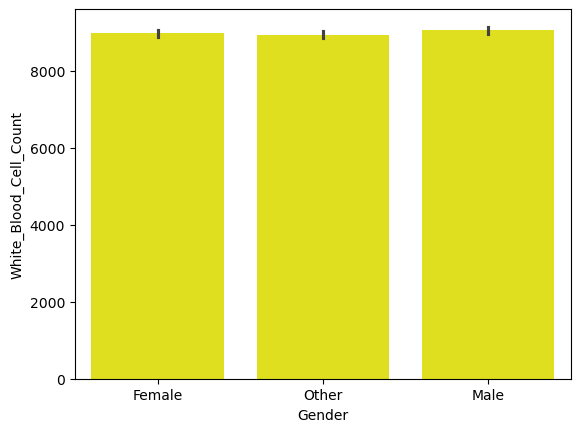

In [11]:
sns.barplot(x="Gender",y="White_Blood_Cell_Count",data=data,color='yellow')
plt.show()

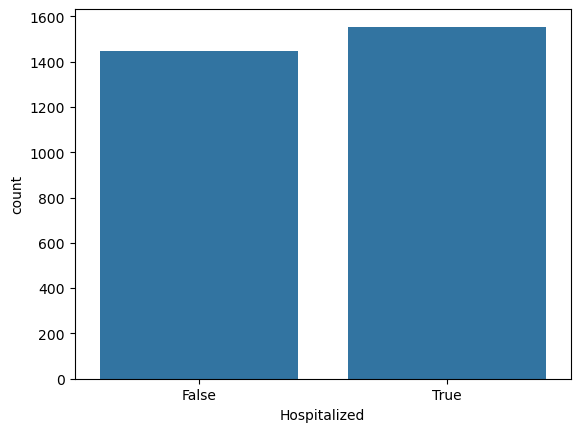

In [12]:
sns.countplot(x="Hospitalized",data=data,)
plt.show()

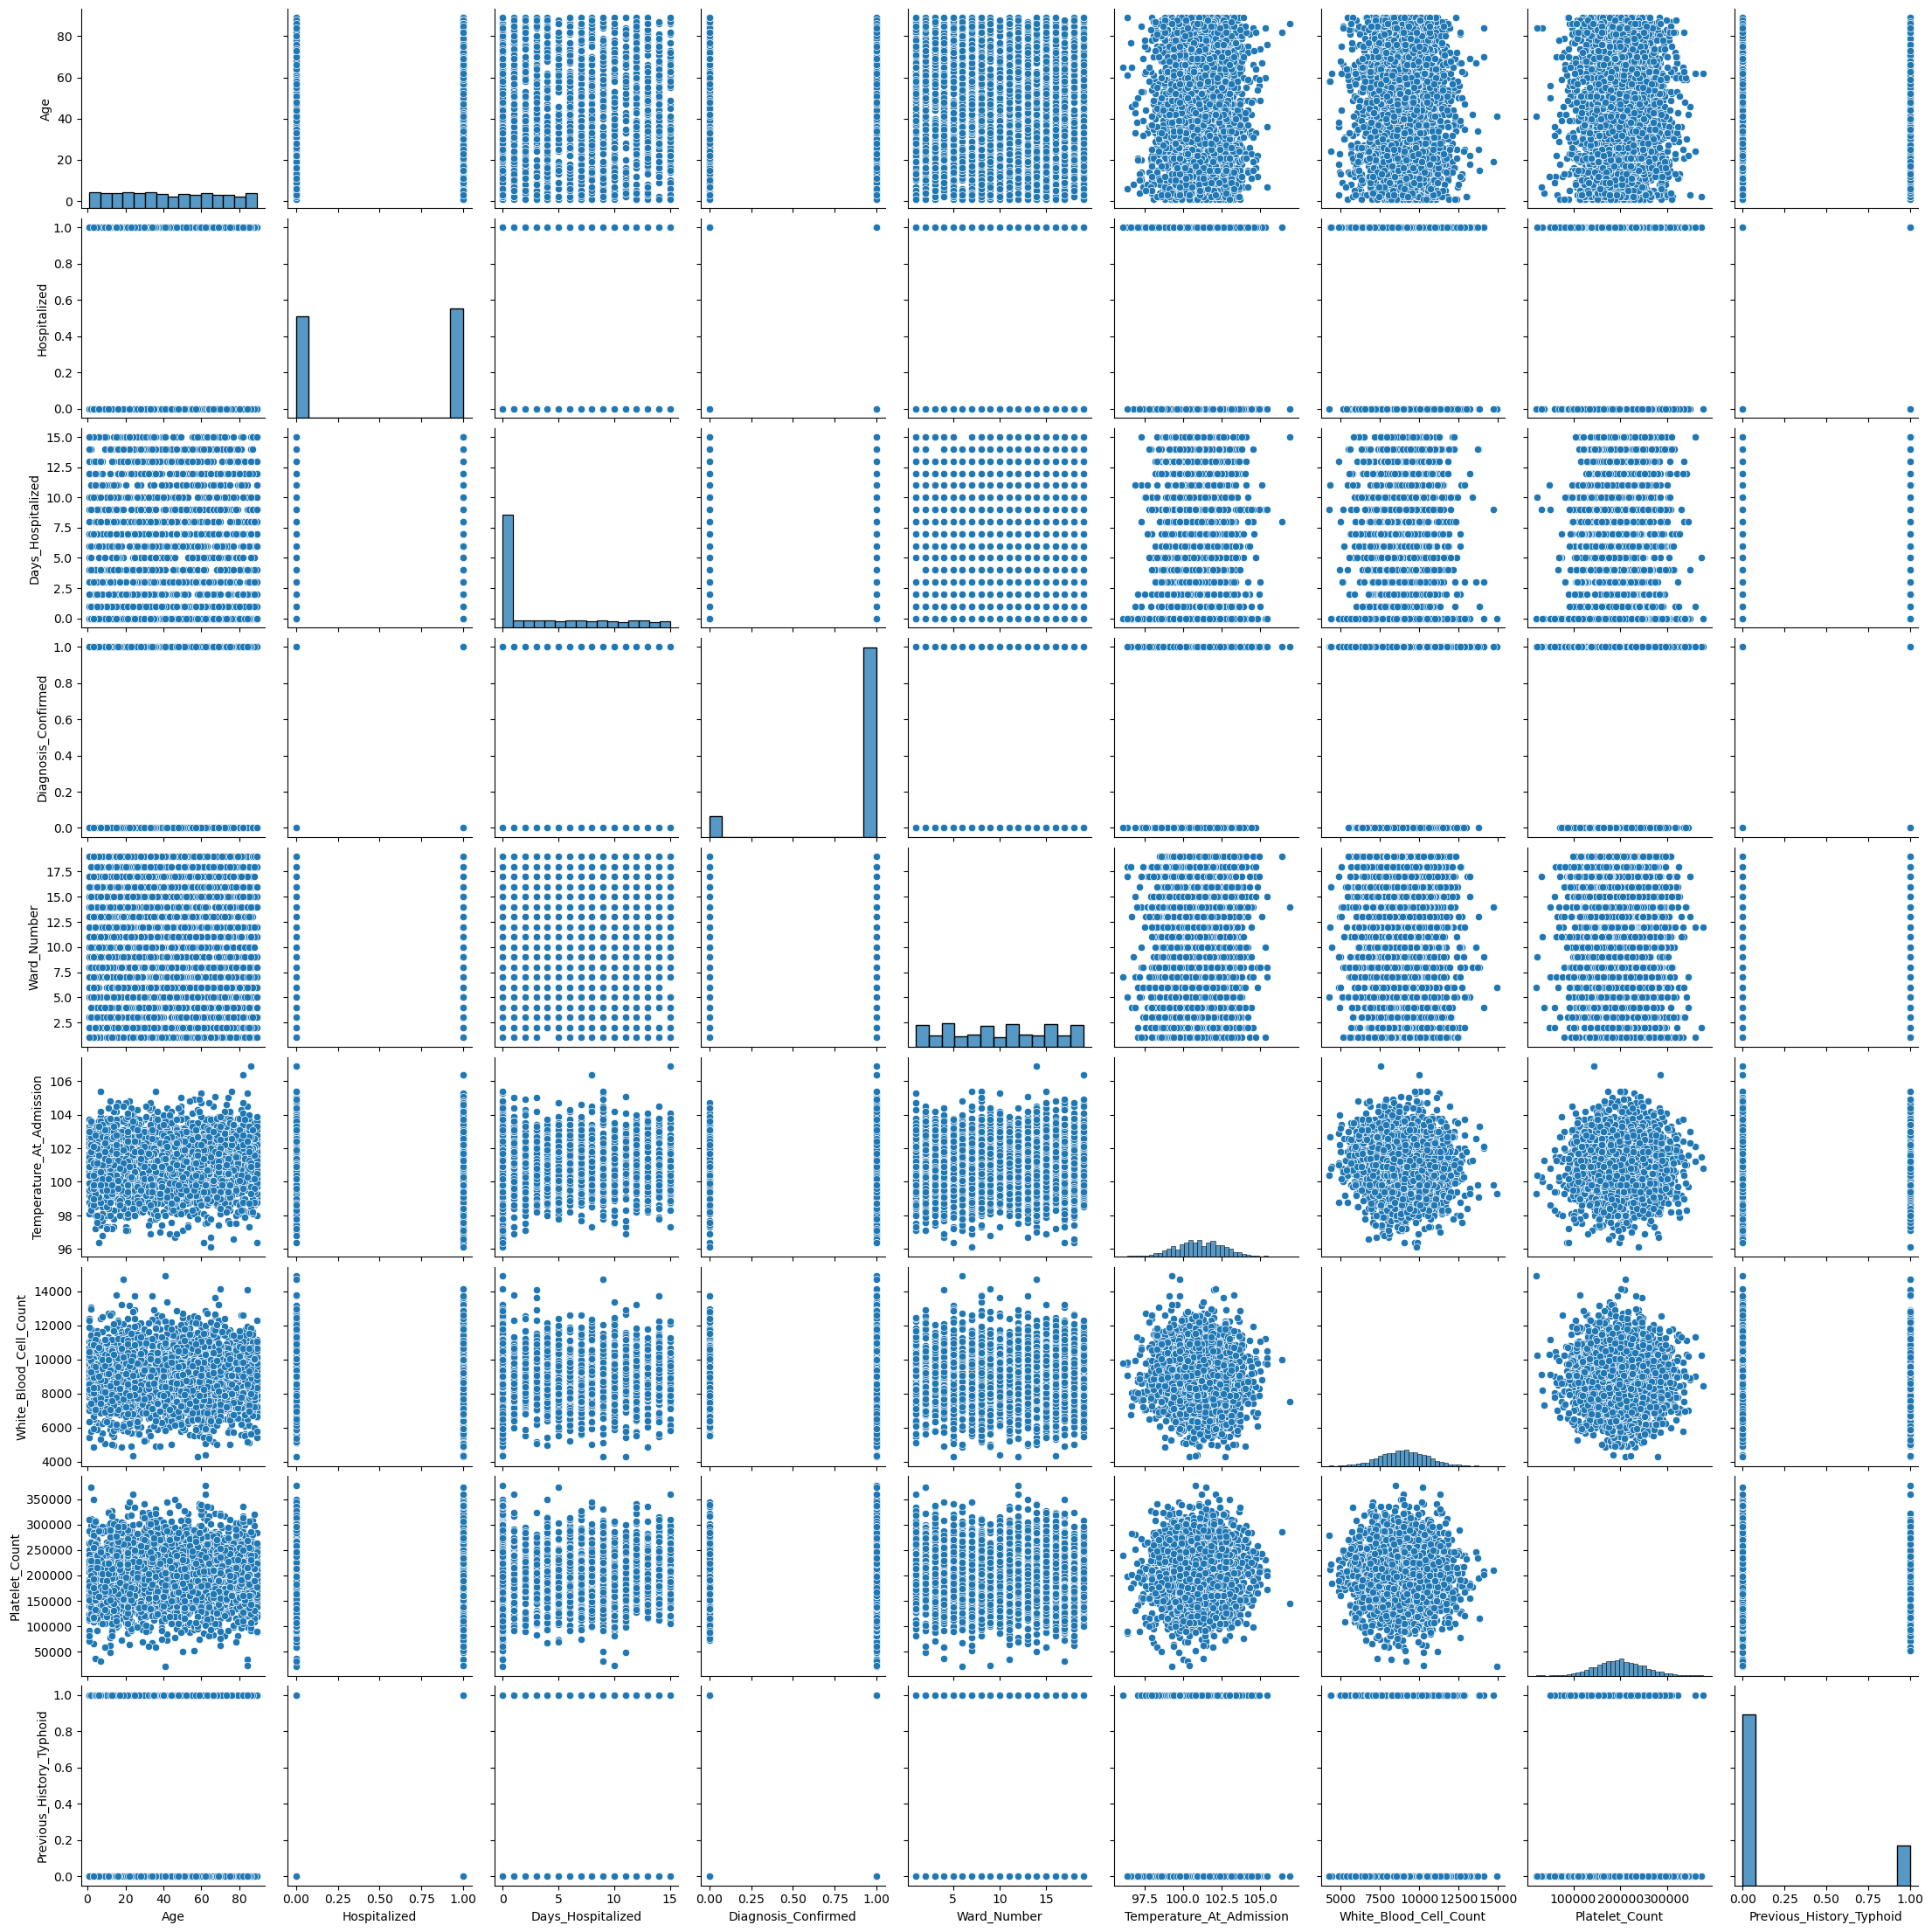

In [13]:
sns.pairplot(data=data)
plt.show()

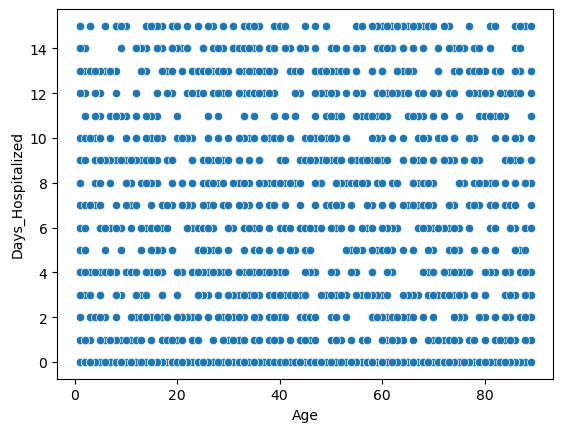

In [14]:
sns.scatterplot(x="Age",y="Days_Hospitalized",data=data)
plt.show()